In [1]:
%load_ext autoreload
%autoreload 2

from graphs import *
from gallagher_algorithm import initializePhi
import networkx as nx
import numpy as np

from scipy.optimize import minimize, LinearConstraint

import matplotlib.pyplot as plt
%matplotlib inline

/Users/akshayyeluri/anaconda3/envs/neural/lib/python3.6/site-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


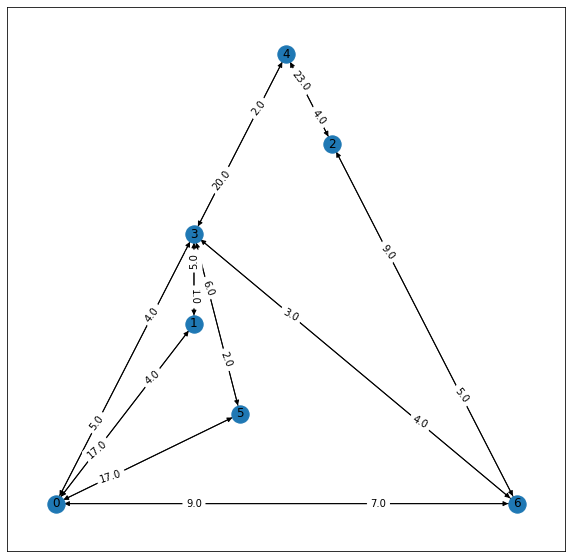

In [2]:
net = Network(n=7, p=0.3, seed=8)
net.setPhi(initializePhi(net))
net.visualize(withEdgeTraffic=True, layout='planar')
plt.gcf().set_size_inches(10, 10)

In [3]:
phi0 = initializePhi(net)
x0 = net.converter.fromPhi(phi0)
#x0 = np.random.rand(net.df)

bounds = np.zeros((len(x0), 2))
bounds[:, 1] = 1

res = minimize(obj, x0=x0, args=(net), bounds=bounds)
phi_best = net.converter.toPhi(np.round(res.x, 4))

In [4]:
obj(res.x, net), obj(x0, net)

(123.0, 147.0)

In [5]:
net.setPhi(phi0)
print('D_T original: ', net.D_T())
og = net.F

net.setPhi(phi_best)
print('D_T post optimization: ', net.D_T())
new = net.F

D_T original:  147.0
D_T post optimization:  123.0


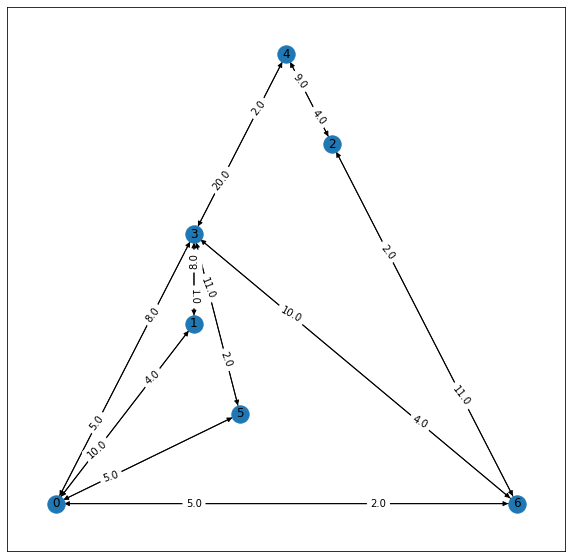

In [6]:
net.visualize(withEdgeTraffic=True, layout='planar')
plt.gcf().set_size_inches(10, 10)